In [1]:
# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

**Find the original data here:**
https://opendata-downloads.s3.amazonaws.com/opa_properties_public.csv

**Find the data codebook here**:
https://metadata.phila.gov/#home/datasetdetails/5543865f20583086178c4ee5/representationdetails/55d624fdad35c7e854cb21a4/?view_287_page=1

In [2]:
# read original data
df = pd.read_csv('opa_properties_public.csv', header=0)
print(df.shape)
print(df.columns)
df.head()

(581191, 78)
Index(['objectid', 'assessment_date', 'basements', 'beginning_point',
       'book_and_page', 'building_code', 'building_code_description',
       'category_code', 'category_code_description', 'census_tract',
       'central_air', 'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_date', 'registry_nu

,objectid,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,pin,lat,lng
0,96022750,2022-03-08 14:22:35,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,32.0,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1428,NaN,1428L S TAYLOR ST,100 W OXFORD ST E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,100.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000016,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681390,-75.185501,39.934553
1,96022751,2022-03-08 14:16:10,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,2,Multi Family,32.0,NaN,NaN,NaN,NaN,29400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1419,NaN,1419L S TAYLOR ST,100 W OXFORD ST E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,29400.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000015,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681388,-75.185177,39.934722
2,96022752,2022-03-08 14:14:15,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,14,NaN,32.0,NaN,NaN,NaN,NaN,14200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1410,NaN,1410L S TAYLOR ST,100 W OXFORD ST SUITE E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,14200.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,MAMIE NICHOLS LIMITED PARTNERSHIP,NaN,886000013,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,L,0.0,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681384,-75.185423,39.934910
3,96022753,2022-03-08 14:08:24,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,6,Vacant Land,32.0,NaN,NaN,NaN,NaN,0.0,5200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1410,NaN,1410 S TAYLOR ST,100 W OXFORD ST SUITE E-2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,5200.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,COMMUNITY JUSTICE LAND TRUST,NaN,886000012,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,NaN,0.0,0.0,F,681.0,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681383,-75.185423,39.934910
4,96022754,2022-03-08 14:14:36,NaN,SWC REED ST,53764990.0,SR,VACANT LAND RESIDE < ACRE,6,Vacant Land,32.0,NaN,NaN,NaN,NaN,0.0,21000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,1413,NaN,1413 S TAYLOR ST,100 W OXFORD ST SUITE E2300,NaN,NaN,PHILADELPHIA PA,NaN,19122,21000.0,NaN,NaN,NaN,NaN,NaN,2824.0,NaN,COMMUNITY JUSTICE LAND TRUST,NaN,886857100,E,NaN,2021-12-16 00:00:00,10S23 37,2020-12-10 00:00:00,1.0,NaN,NaN,NaN,PA,76780,ST,S,TAYLOR,NaN,0.0,0.0,F,712.0,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,19146.0,RSA5,1001681385,-75.185151,39.934839


### Step 1: prescreen related columns and rows 

**1.1 remove clearly unrelated columns**

**Columns kept after step 1.1**:\
'assessment_date', 'basements', 'category_code_description','census_tract', 'central_air',\
'depth', 'exterior_condition', 'fireplaces', 'frontage', 'fuel',\
'garage_spaces', 'garage_type', 'geographic_ward', 'house_number', 'interior_condition',\
'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories',\
'quality_grade', 'sale_date', 'sale_price', 'separate_utilities', 'sewer',\
'site_type', 'street_designation','street_direction', 'topography', 'total_area',\
'total_livable_area', 'type_heater', 'unfinished', 'unit', 'utility',\
'view_type', 'year_built', 'zip_code', 'lat', 'lng'

In [3]:
# place columns of interest into a list
cols_step11 = ['assessment_date', 'basements', 'category_code_description','census_tract', 'central_air',
               'depth', 'exterior_condition', 'fireplaces', 'frontage', 'fuel',
               'garage_spaces', 'garage_type', 'geographic_ward', 'house_number', 'interior_condition',
               'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms', 'number_of_rooms', 'number_stories',
               'quality_grade', 'sale_date', 'sale_price', 'separate_utilities', 'sewer',
               'site_type', 'street_designation','street_direction', 'topography', 'total_area',
               'total_livable_area', 'type_heater', 'unfinished', 'unit', 'utility',
               'view_type', 'year_built', 'zip_code', 'lat', 'lng']
print(len(cols_step11))
data_step11 = df[cols_step11]

40


**1.2 drop columns with more than 50% missing values**

In [4]:
# compute percentage of missing values for each column
data_step11.isnull().sum()/len(data_step11)

assessment_date              0.940806
basements                    0.437612
category_code_description    0.000241
census_tract                 0.000071
central_air                  0.505662
depth                        0.001173
exterior_condition           0.047583
fireplaces                   0.007855
frontage                     0.001182
fuel                         0.973475
garage_spaces                0.008280
garage_type                  0.137328
geographic_ward              0.000071
house_number                 0.000000
interior_condition           0.048943
market_value_date            1.000000
number_of_bathrooms          0.007688
number_of_bedrooms           0.007042
number_of_rooms              0.057768
number_stories               0.007030
quality_grade                0.902956
sale_date                    0.000002
sale_price                   0.000019
separate_utilities           0.955760
sewer                        0.984511
site_type                    0.490429
street_desig

In [5]:
# drop columns with over 50% missing values
data_step12 = data_step11.drop(['assessment_date', 'fuel', 'market_value_date', 'quality_grade', 'separate_utilities', 
                                'sewer', 'street_direction', 'unfinished', 'unit', 'utility'], axis = 1)
print(len(data_step12.columns))
print(data_step12.columns)
print(data_step12.info())

30
Index(['basements', 'category_code_description', 'census_tract', 'central_air',
       'depth', 'exterior_condition', 'fireplaces', 'frontage',
       'garage_spaces', 'garage_type', 'geographic_ward', 'house_number',
       'interior_condition', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'sale_date', 'sale_price',
       'site_type', 'street_designation', 'topography', 'total_area',
       'total_livable_area', 'type_heater', 'view_type', 'year_built',
       'zip_code', 'lat', 'lng'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581191 entries, 0 to 581190
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   basements                  326855 non-null  object 
 1   category_code_description  581051 non-null  object 
 2   census_tract               581150 non-null  float64
 3   central_air                287305 no

**1.3 drop rows where sale_date or sale_price is missing**

In [6]:
data_step13 = data_step12[data_step12['sale_date'].notna()]
data_step13 = data_step13[data_step13['sale_price'].notna()]

In [7]:
data_step1_final = data_step13
print(data_step1_final.shape)

(581180, 30)


### Step 2: recode categorical data

**replace and combine category**

In [8]:
data_step2 = data_step1_final

In [9]:
# feature 0: basements
data_step2['basements'] = data_step1_final['basements'].replace({'0':'None','1':'full','2':'full','3':'full','4':'full',
                                                        'A':'full', 'B': 'full','C': 'full','D': 'full','E':'partial',
                                                        'F':'partial','G':'partial','H':'partial','I':'full',
                                                        'J':'partial'})
print(data_step2['basements'].value_counts(dropna=False))

NaN        254328
full       169100
partial    146574
None        11178
Name: basements, dtype: int64


In [10]:
# feature 3: central_air
data_step2['central_air'] = data_step1_final['central_air'].replace({'0': 'N', '1': 'Y','Y': 'Y', 'N': 'N'})
print(data_step2['central_air'].value_counts(dropna=False))

NaN    293879
N      174067
Y      113234
Name: central_air, dtype: int64


In [11]:
# feature 5: exterior_condition
data_step2['exterior_condition'] = data_step1_final['exterior_condition'].replace({0:'none',1:'new',2:'rehabbed',
                                                                          3:'above average',4:'rehabbed',5:'average', 
                                                                          6: 'below average',7:'vacant',8:'sealed',
                                                                          9:'compromised'})
print(data_step2.exterior_condition.value_counts(dropna=False))

rehabbed         450107
above average     43662
NaN               27648
none              19411
average           17679
new               13767
vacant             5702
below average      3204
Name: exterior_condition, dtype: int64


In [12]:
# feature 9: garage_type
data_step2['garage_type'] = data_step1_final['garage_type'].replace({'A':'builtin', 'B':'attached','C':'detached',
                                                            'F':'converted', 'S':'selfpark', 'T':'attendant',
                                                            '0':'none', '0.0':'none', 0.0:'none',
                                                            '1':'builtin', '1.0':'builtin', 1.0:'builtin',
                                                            '2':'attached', '2.0':'attached', 2.0:'attached',
                                                            '3':'detached', '3.0':'detached', 3.0:'detached'})
print(data_step2.garage_type.value_counts(dropna=False))

none         305796
builtin      141055
NaN           79806
converted     22974
detached      19019
attached       9191
selfpark       2597
attendant       742
Name: garage_type, dtype: int64


In [13]:
# feature 11: house_number
data_step2['house_number'] = np.where(data_step2['house_number']%2==0, 'South or West', 'North or East')

In [14]:
print(data_step2.house_number.value_counts(dropna=False))

South or West    293055
North or East    288125
Name: house_number, dtype: int64


In [15]:
# feature 11: interior_condition
data_step2['interior_condition'] = data_step1_final['interior_condition'].replace({0:'none',1:'new',2:'new',
                                                                          3:'above average',4:'average', 
                                                                          5:'below average',6:'vacant',7:'sealed'})
print(data_step2.exterior_condition.value_counts(dropna=False))

rehabbed         450107
above average     43662
NaN               27648
none              19411
average           17679
new               13767
vacant             5702
below average      3204
Name: exterior_condition, dtype: int64


In [16]:
# feature 19: site_type
print(data_step2['site_type'].value_counts(dropna=False))

NaN    285022
A      257318
B       37545
D         638
C         390
E         204
G          33
F          30
Name: site_type, dtype: int64


In [17]:
# feaure 20: street_designation
data_step2['street_designation'] = data_step1_final['street_designation'].astype("string")
data_step2['street_designation'].fillna('Other',inplace=True)
data_step2['street_designation'] = np.where(data_step1_final['street_designation'].str.match("ST"), "ST",
                                   np.where(data_step1_final['street_designation'].str.match("AVE"), "AVE",
                                   np.where(data_step1_final['street_designation'].str.match("RD"), "RD",
                                   np.where(data_step1_final['street_designation'].str.match("LA"), "LA",
                                   np.where(data_step1_final['street_designation'].str.match("DR"), "DR",
                                   np.where(data_step1_final['street_designation'].str.match("PL"), "PL",
                                   np.where(data_step1_final['street_designation'].str.match("BLV"), "BLV","Other")))))))
print(data_step2['street_designation'].value_counts(dropna=False))

ST       426720
AVE       91126
RD        31076
Other      9340
LA         8201
DR         5920
PL         5887
BLV        2910
Name: street_designation, dtype: int64


In [18]:
# feature 21: topography      
data_step2['topography'] = data_step1_final['topography'].replace({'0':'None'})
print(data_step2['topography'].value_counts(dropna=False))

F       506506
NaN      38881
A        30411
E         4816
B          256
C          174
D          113
None        23
Name: topography, dtype: int64


In [19]:
# feature 24: type_heater  
data_step2['type_heater'] = data_step1_final['type_heater'].replace({'0':'None'})
print(data_step2['type_heater'].value_counts(dropna=False))

NaN     285925
H       125267
A        97964
B        60880
G         4916
C         2979
None      1907
E          755
D          587
Name: type_heater, dtype: int64


In [20]:
# feature 25: view_type 
data_step2['view_type'] = data_step1_final['view_type'].replace({'0':'None'})
print(data_step2['view_type'].value_counts(dropna=False))

I       521723
NaN      20995
A        15277
C         7613
None      4965
D         4018
H         2738
E         2081
B         1770
Name: view_type, dtype: int64


In [21]:
data_step2_final = data_step2
print(data_step2_final.shape)

(581180, 30)


### Step 3: transform numerical data

**transform numerical data and feature engineering**

In [22]:
data_step3 = data_step2_final

In [23]:
# sale_date into sale_year, sale_month, sale_week, sale_day and sale_dow 
data_step3['sale_date'] = pd.to_datetime(data_step2_final['sale_date'])
data_step3['sale_year'] = data_step2_final['sale_date'].dt.year
data_step3['sale_month'] = data_step2_final['sale_date'].dt.month
data_step3['sale_week'] = data_step2_final['sale_date'].dt.isocalendar().week
data_step3['sale_week'] = data_step2_final['sale_week'].astype(int)
data_step3['sale_day'] = data_step2_final['sale_date'].dt.day
data_step3['sale_dow'] = data_step2_final['sale_date'].dt.dayofweek
data_step3 = data_step3.drop(['sale_date'], axis=1)

In [24]:
# year_built to age
data_step3['year_built'] = data_step2_final['year_built'].replace('196Y', np.NaN)
data_step3['age'] = 2022 - pd.to_numeric(data_step3["year_built"])
data_step3 = data_step3.drop(['year_built'], axis=1)

In [25]:
# bath_bed_ratio
data_step3['bath_bed_ratio'] = data_step2_final['number_of_bathrooms']/data_step2_final['number_of_bedrooms']

In [26]:
# bath_total_ratio
data_step3['bath_total_ratio'] = data_step2_final['number_of_bathrooms']/data_step2_final['number_of_rooms']

In [27]:
# bed_total_ratio
data_step3['bed_total_ratio'] = data_step2_final['number_of_bedrooms']/data_step2_final['number_of_rooms']

In [28]:
# livable_area_ratio
data_step3['livable_area_ratio'] = data_step2_final['total_livable_area']/data_step2_final['total_area']

26


<AxesSubplot:>

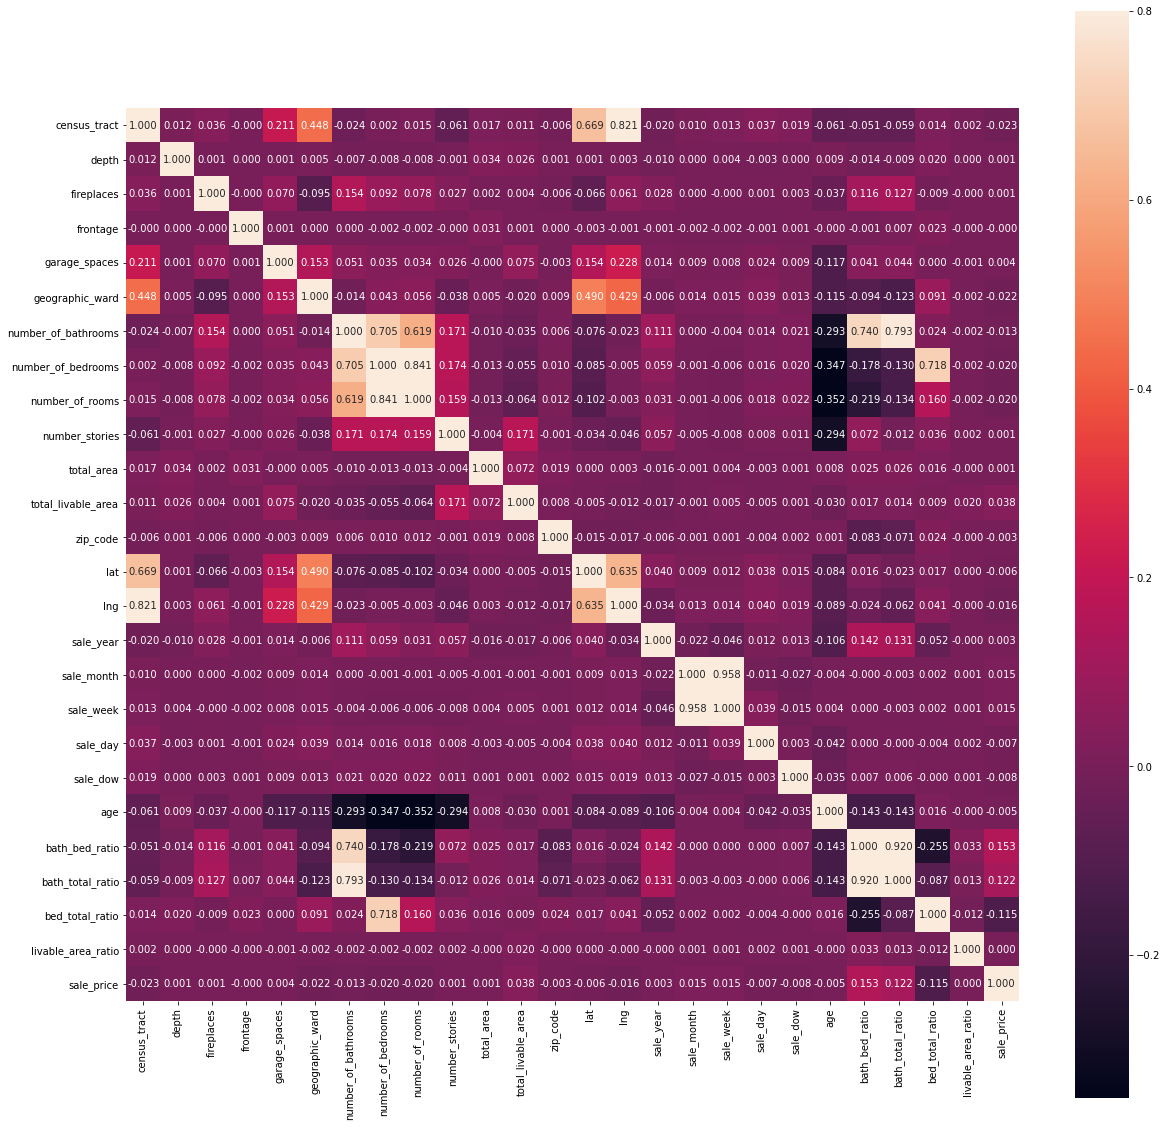

In [29]:
num_feat_1 = ['census_tract','depth', 'fireplaces', 'frontage', 'garage_spaces',
              'geographic_ward','number_of_bathrooms','number_of_bedrooms', 'number_of_rooms','number_stories',
              'total_area', 'total_livable_area', 'zip_code','lat', 
              'lng','sale_year','sale_month','sale_week', 'sale_day',
              'sale_dow', 'age','bath_bed_ratio', 'bath_total_ratio', 'bed_total_ratio',
              'livable_area_ratio', 'sale_price']
print(len(num_feat_1))

# draw a correlation heatmap of features
corr = data_step3[num_feat_1].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, annot=True, fmt='.3f', square=True)

In [30]:
# change 1: remove census_tract
data_step3 = data_step3.drop(['census_tract'], axis=1)

In [31]:
# change 2: remove bath_bed_ratio
data_step3 = data_step3.drop(['bath_bed_ratio'], axis=1)

In [32]:
# change 3: change sale_week to week number of month and remove sale_day 
data_step3['sale_week'] = data_step3['sale_day']//7+1
data_step3 = data_step3.drop(['sale_day'],axis=1)

23


<AxesSubplot:>

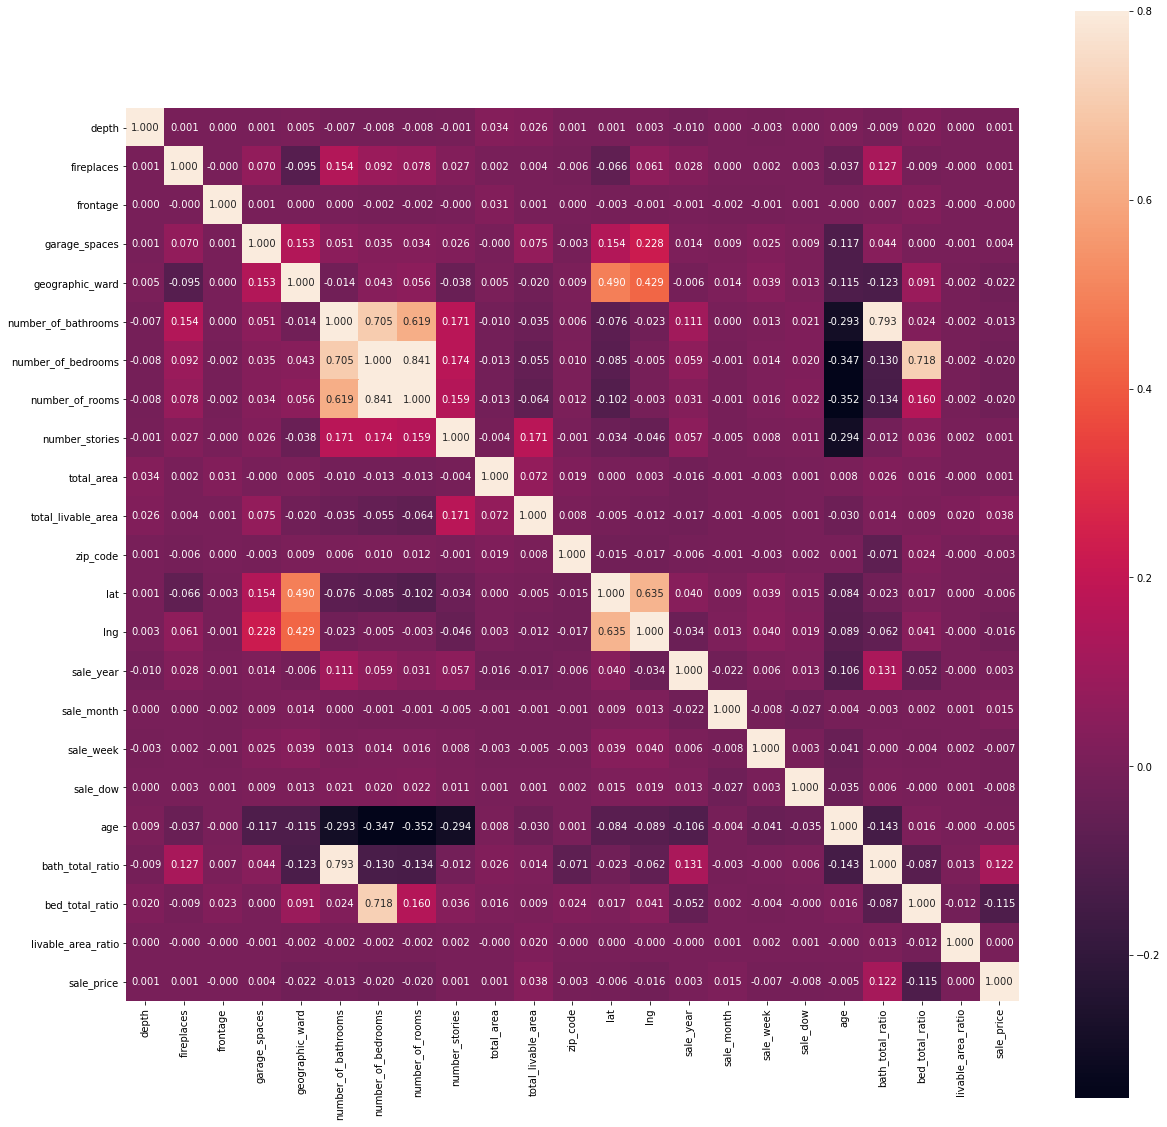

In [33]:
num_feat_2 = ['depth', 'fireplaces', 'frontage', 'garage_spaces', 'geographic_ward',
              'number_of_bathrooms','number_of_bedrooms', 'number_of_rooms','number_stories','total_area', 
              'total_livable_area', 'zip_code','lat', 'lng','sale_year',
              'sale_month','sale_week','sale_dow', 'age', 'bath_total_ratio', 
              'bed_total_ratio', 'livable_area_ratio', 'sale_price']
print(len(num_feat_2))

# drwa a correlation heatmap of features
corr = data_step3[num_feat_2].corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, annot=True, fmt='.3f', square=True)

In [34]:
# change infinity values
data_step3.loc[data_step3['bath_total_ratio']==data_step3['bath_total_ratio'].max(),'bath_total_ratio']=data_step3['bath_total_ratio'].median()
data_step3.loc[data_step3['bed_total_ratio']==data_step3['bed_total_ratio'].max(),'bed_total_ratio']=data_step3['bed_total_ratio'].median()
data_step3.loc[data_step3['livable_area_ratio']==data_step3['livable_area_ratio'].max(),'livable_area_ratio']=data_step3['livable_area_ratio'].median()

In [35]:
data_step3_final = data_step3
print(data_step3_final.shape)

(581180, 35)


### Step 4:  drop extreme low and high sale price

**drop rows with sales price of less than 1 thousand and greater than 5 million dollars**

In [36]:
data_step4 = data_step3_final[(data_step3_final['sale_price']>1000)&(data_step3_final['sale_price']<5000000)]

In [37]:
data_step4_final = data_step4
print(data_step4_final.shape)

(399605, 35)


### Step 5: split into training, validation and test set by 6 different property types

**split the data into training and test sets:   
The training and validation dataset contains all rows with property sold during 2010 and 2019.    
The test dataset contains all rows with property sold during 2020 and 2021.**

In [38]:
# create a function to split data
def split(data):
    data = data[data['sale_year']>2009]
    X_train = data[data['sale_year']<2020].drop(['sale_price'],axis=1)
    y_train = data.loc[X_train.index, 'sale_price']/1000
    X_test = data[data['sale_year']>2019].drop(['sale_price'],axis=1)
    y_test = data.loc[X_test.index, 'sale_price']/1000
    X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
    X_train_train = X_train_train.drop(['category_code_description'], axis=1)
    X_train_val = X_train_val.drop(['category_code_description'], axis=1) 
    X_test = X_test.drop(['category_code_description'], axis=1)
    return X_train_train, X_train_val, X_test, y_train_train, y_train_val, y_test

In [39]:
X_train_sf,X_val_sf,X_test_sf,y_train_sf,y_val_sf,y_test_sf = split(data_step4_final.query('category_code_description=="Single Family"'))
X_train_mf,X_val_mf,X_test_mf,y_train_mf,y_val_mf,y_test_mf = split(data_step4_final.query('category_code_description=="Multi Family"'))
X_train_mx,X_val_mx,X_test_mx,y_train_mx,y_val_mx,y_test_mx = split(data_step4_final.query('category_code_description=="Mixed Use"'))
X_train_id,X_val_id,X_test_id,y_train_id,y_val_id,y_test_id = split(data_step4_final.query('category_code_description=="Industrial"'))
X_train_cm,X_val_cm,X_test_cm,y_train_cm,y_val_cm,y_test_cm = split(data_step4_final.query('category_code_description=="Commercial"'))
X_train_va,X_val_va,X_test_va,y_train_va,y_val_va,y_test_va = split(data_step4_final.query('category_code_description=="Vacant Land"'))         

In [40]:
# save y_train, y_val and y_test to csv
y_train_sf.to_csv('y_train_sf.csv')
y_train_mf.to_csv('y_train_mf.csv')
y_train_mx.to_csv('y_train_mx.csv')
y_train_id.to_csv('y_train_id.csv')
y_train_cm.to_csv('y_train_cm.csv')
y_train_va.to_csv('y_train_va.csv')
y_val_sf.to_csv('y_val_sf.csv')
y_val_mf.to_csv('y_val_mf.csv')
y_val_mx.to_csv('y_val_mx.csv')
y_val_id.to_csv('y_val_id.csv')
y_val_cm.to_csv('y_val_cm.csv')
y_val_va.to_csv('y_val_va.csv')
y_test_sf.to_csv('y_test_sf.csv')
y_test_mf.to_csv('y_test_mf.csv')
y_test_mx.to_csv('y_test_mx.csv')
y_test_id.to_csv('y_test_id.csv')
y_test_cm.to_csv('y_test_cm.csv')
y_test_va.to_csv('y_test_va.csv')

### Step 6: process training, validation and test data 

**for training data:\
categorical features: fill in mode then one hot encode\
numercial features: fill in median then standardize**\
**for validation and test data:\
use statistical traits in training data to process validation and test data**

In [41]:
# for categorical data, fill missing values with mode and then one-hot encode
cat_features = ['basements', 'central_air', 'exterior_condition', 'garage_type', 'house_number',
                'interior_condition', 'site_type','street_designation', 'topography', 'type_heater', 
                'view_type']
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

# for numerical data, fill missing values with median and then scale
num_features = ['depth', 'fireplaces', 'frontage', 'garage_spaces','geographic_ward', 
                'number_of_bathrooms','number_of_bedrooms', 'number_of_rooms','number_stories', 'total_area', 
                'total_livable_area', 'zip_code','lat', 'lng', 'sale_year',
                'sale_month','sale_week','sale_dow', 'age','bath_total_ratio', 
                'bed_total_ratio','livable_area_ratio']
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

# Combine two transformers into single ColumnTransformer preprocessor
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_features),
    ('num', num_pipe, num_features)
])

In [42]:
# use pipeline to fit training data
def train_val_test(train,val,test):
    preprocessor_train = preprocessor.fit(train)
    cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names(cat_features)
    columns = np.append(cat_columns, num_features)
    X_train = pd.DataFrame(preprocessor_train.transform(train), index=train.index, columns=columns)
    X_val = pd.DataFrame(preprocessor_train.transform(val), index=val.index, columns=columns)
    X_test = pd.DataFrame(preprocessor_train.transform(test), index=test.index, columns=columns)
    return X_train, X_val, X_test

In [43]:
X_train_sf, X_val_sf, X_test_sf = train_val_test(X_train_sf,X_val_sf,X_test_sf)
X_train_mf, X_val_mf, X_test_mf = train_val_test(X_train_mf,X_val_mf,X_test_mf)
X_train_mx, X_val_mx, X_test_mx = train_val_test(X_train_mx,X_val_mx,X_test_mx)
X_train_id, X_val_id, X_test_id = train_val_test(X_train_id,X_val_id,X_test_id)
X_train_cm, X_val_cm, X_test_cm = train_val_test(X_train_cm,X_val_cm,X_test_cm)
X_train_va, X_val_va, X_test_va = train_val_test(X_train_va,X_val_va,X_test_va)

In [44]:
# save training data files
X_train_sf.to_csv('X_train_sf.csv')
X_train_mf.to_csv('X_train_mf.csv')
X_train_mx.to_csv('X_train_mx.csv')
X_train_id.to_csv('X_train_id.csv')
X_train_cm.to_csv('X_train_cm.csv')
X_train_va.to_csv('X_train_va.csv')
X_val_sf.to_csv('X_val_sf.csv')
X_val_mf.to_csv('X_val_mf.csv')
X_val_mx.to_csv('X_val_mx.csv')
X_val_id.to_csv('X_val_id.csv')
X_val_cm.to_csv('X_val_cm.csv')
X_val_va.to_csv('X_val_va.csv')
X_test_sf.to_csv('X_test_sf.csv')
X_test_mf.to_csv('X_test_mf.csv')
X_test_mx.to_csv('X_test_mx.csv')
X_test_id.to_csv('X_test_id.csv')
X_test_cm.to_csv('X_test_cm.csv')
X_test_va.to_csv('X_test_va.csv')